# Example 3

# Secure Future

Jordan Smith is a financial advisor at
Secure Futures, Inc., specializing in
building retirement income
portfolios using corporate bonds. He
just finished meeting with a client
who will have $900,000 available to
invest upon retirement next month.
Jordan and his client agreed to
consider upcoming bond issues from
the following six companies:

- see below

- Jordan considers all these companies to be safe investments overall.
However, to protect the client’s income, they agreed to the following
restrictions:
- No more than 25% of the total money should be invested in any single
bond issue.
- At least 50% of the money should be invested in long-term bonds (those
maturing in 10 or more years).
- Although Beta Industries, CoreTech, and Skywave Inc. offer the highest
returns, they also have lower ratings. Therefore, no more than 35% of the
total money should be allocated to these three bonds combined.
- Jordan now needs to determine how to allocate the client’s investments to
maximize her annual income while satisfying all agreed-upon restrictions.

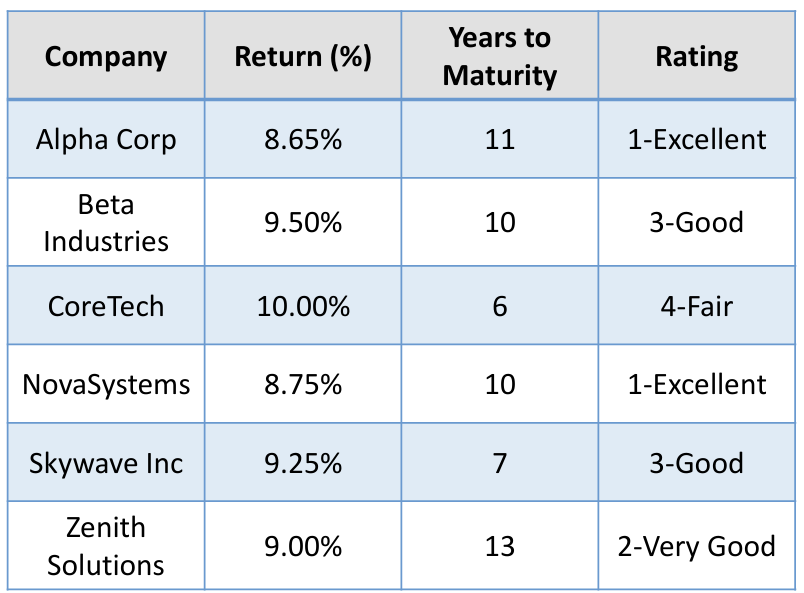

In [ ]:
from IPython.display import Image, display
display(Image('/content/example_3_secure_future_table.png'))


In [ ]:
from ortools.linear_solver import pywraplp

def solve():
    # Create the solver
    solver = pywraplp.Solver.CreateSolver('SCIP')

    if not solver:
        print('Solver not created.')
        return

    # Define variables
    x = []
    for i in range(6):
        x.append(solver.IntVar(0.0, solver.infinity(), f'x_{i+1}'))

    # Define the objective function
    objective = solver.Objective()
    coefficients = [0.0865, 0.095, 0.10, 0.0875, 0.0925, 0.09]
    for i in range(6):
        objective.SetCoefficient(x[i], coefficients[i])
    objective.SetMaximization()

    # Add the constraints
    solver.Add(x[0] + x[1] + x[2] + x[3] + x[4]+ x[5] == 900000)

    for i in range(6):
        solver.Add(x[i] <= 225000)

    solver.Add(x[0] + x[1] + x[3] + x[5] >= 450000)
    solver.Add(x[1] + x[2] + x[4] <= 315000)

    # Solve the problem
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print(f'Optimal solution found with objective value: {objective.Value()}')
        for i in range(6):
            print(f'x_{i+1} = {x[i].solution_value()}')

        print()
        print(f"Problem solved in {solver.wall_time():d} milliseconds")
        print(f"Problem solved in {solver.iterations():d} iterations")
        print(f"Problem solved in {solver.nodes():d} branch-and-bound nodes")
    else:
        print('The problem does not have an optimal solution.')

# Call the function to solve the problem
solve()


Optimal solution found with objective value: 82665.0
x_1 = 135000.0
x_2 = 90000.0
x_3 = 225000.0
x_4 = 225000.0
x_5 = 0.0
x_6 = 225000.0

Problem solved in 13 milliseconds
Problem solved in 3 iterations
Problem solved in 1 branch-and-bound nodes
